In [1]:
!git config --global user.name "Fatom"

In [2]:
!git config --global user.email "zahraelamssane@gmail.com"


In [4]:
!git clone https://github.com/Zohrae/TPDL.git
%cd TPDL

Cloning into 'TPDL'...
/content/TPDL


In [7]:
!cp "/content/MyDrive/CC DM.ipynb" .


cp: cannot stat '/content/MyDrive/CC DM.ipynb': No such file or directory


**Control DataMining**

**SEGMENTATION D'IMAGE:
Technique Ancienne: Watershed Algorithm
Technique Récente: GrabCut Algorithm**

In [ ]:
# ============================================================================
# INSTALLATION ET IMPORTATION DES BIBLIOTHÈQUES
# ============================================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt

print("📦 Bibliothèques importées avec succès!")

📦 Bibliothèques importées avec succès!


In [ ]:
# ============================================================================
# CHARGEMENT DE L'IMAGE
# ============================================================================

# Chemin de l'image sur Google Drive
chemin_image = '/content/drive/MyDrive/00000AAAAAA.jpg'

print(f"📁 Chargement de l'image depuis: {chemin_image}")

# Charger l'image directement depuis le chemin
image_originale = cv2.imread(chemin_image)

if image_originale is None:
    raise FileNotFoundError(f"❌ Image non trouvée à l'emplacement: {chemin_image}")

print(f"✅ Image chargée avec succès!")
print(f"📐 Dimensions: {image_originale.shape}")


📁 Chargement de l'image depuis: /content/drive/MyDrive/00000AAAAAA.jpg
✅ Image chargée avec succès!
📐 Dimensions: (788, 940, 3)



IMAGE ORIGINALE


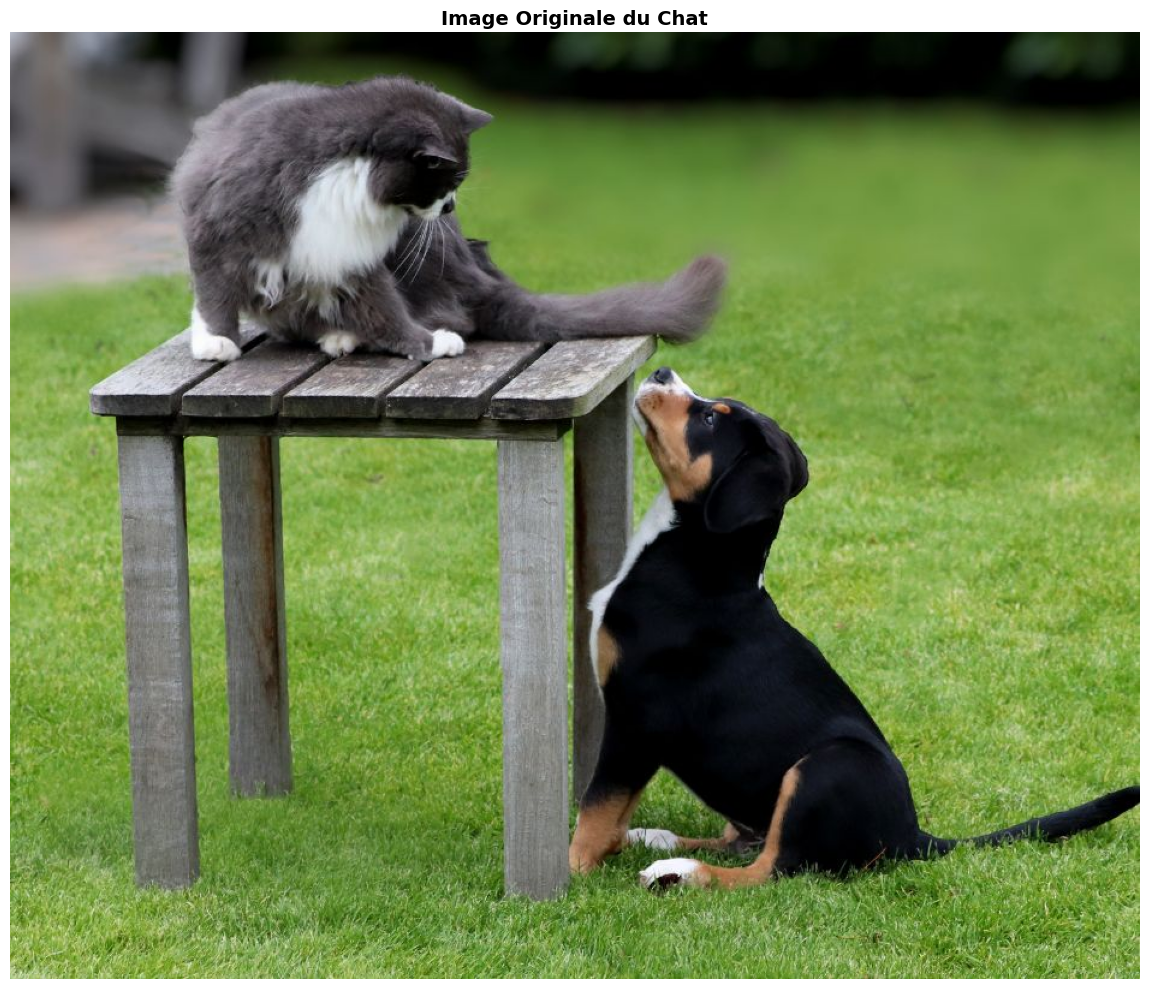

In [ ]:
# ============================================================================
# FONCTION D'AFFICHAGE
# ============================================================================

def afficher_resultats(images, titres, figsize=(20, 10)):
    """
    Affiche plusieurs images côte à côte

    Args:
        images: Liste des images à afficher
        titres: Liste des titres correspondants
        figsize: Taille de la figure
    """
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=figsize)

    if n == 1:
        axes = [axes]

    for idx, (img, titre) in enumerate(zip(images, titres)):
        if len(img.shape) == 2:  # Image en niveaux de gris
            axes[idx].imshow(img, cmap='gray')
        else:  # Image en couleur
            # Convertir BGR en RGB pour matplotlib
            if img.shape[2] == 3:
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                axes[idx].imshow(img_rgb)
            else:
                axes[idx].imshow(img)

        axes[idx].set_title(titre, fontsize=14, fontweight='bold')
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()

# Afficher l'image originale
print("\n" + "="*80)
print("IMAGE ORIGINALE")
print("="*80)
afficher_resultats([image_originale], ["Image Originale du Chat"])



🔵 TECHNIQUE ANCIENNE: ALGORITHME DE WATERSHED (1979)
Description: Segmentation basée sur les lignes de partage des eaux
Inventée par: S. Beucher et C. Lantuéjoul

⚙️ Étape 1/6: Conversion en niveaux de gris...
⚙️ Étape 2/6: Application du filtre bilatéral...
⚙️ Étape 3/6: Seuillage d'Otsu...
⚙️ Étape 4/6: Opérations morphologiques...
⚙️ Étape 5/6: Transform de distance...
⚙️ Étape 6/6: Application de Watershed...
✅ Watershed terminé!

📊 RÉSULTATS WATERSHED:


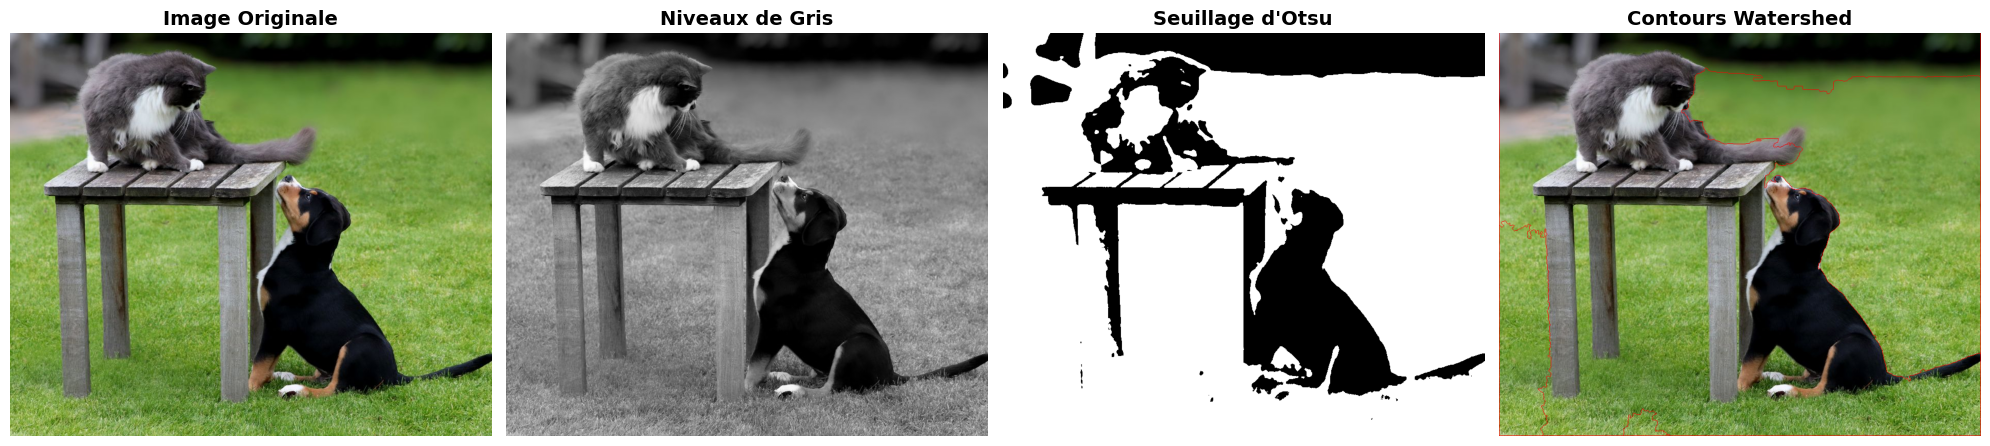

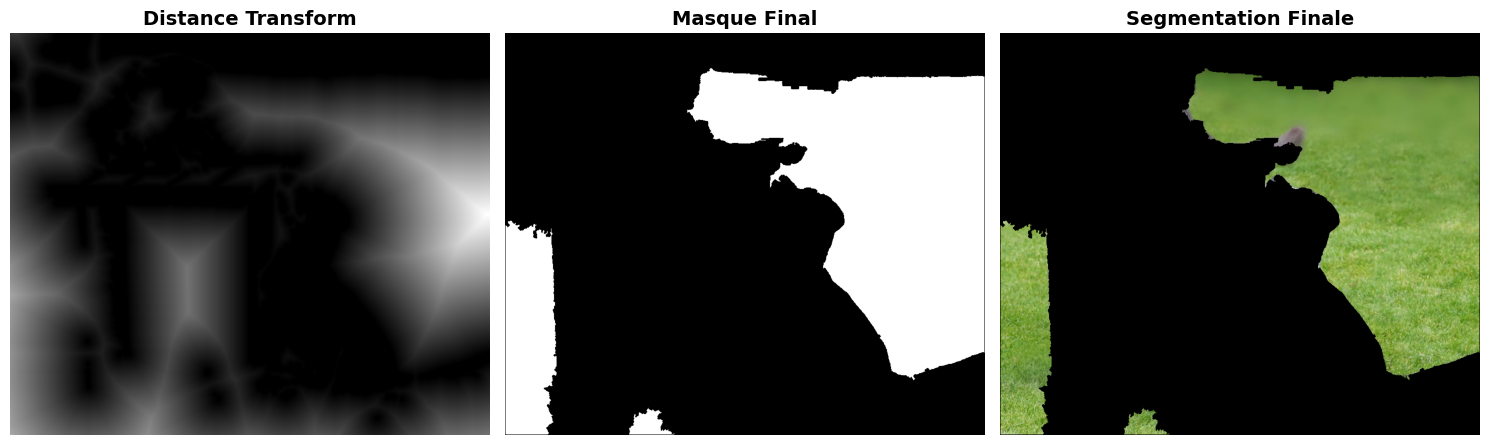

In [ ]:
# ============================================================================
# TECHNIQUE ANCIENNE: WATERSHED ALGORITHM (1979)
# ============================================================================

print("\n" + "="*80)
print("🔵 TECHNIQUE ANCIENNE: ALGORITHME DE WATERSHED (1979)")
print("="*80)
print("Description: Segmentation basée sur les lignes de partage des eaux")
print("Inventée par: S. Beucher et C. Lantuéjoul\n")

def segmentation_watershed(image):
    """
    Segmentation d'image utilisant l'algorithme Watershed

    Étapes:
    1. Conversion en niveaux de gris
    2. Débruitage avec filtre bilatéral
    3. Seuillage pour extraire le premier plan
    4. Opérations morphologiques pour nettoyer
    5. Distance Transform pour trouver les zones certaines
    6. Application de l'algorithme Watershed
    """

    # Étape 1: Conversion en niveaux de gris
    print("⚙️ Étape 1/6: Conversion en niveaux de gris...")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Étape 2: Débruitage avec filtre bilatéral
    print("⚙️ Étape 2/6: Application du filtre bilatéral...")
    denoised = cv2.bilateralFilter(gray, 9, 75, 75)

    # Étape 3: Seuillage d'Otsu pour obtenir une image binaire
    print("⚙️ Étape 3/6: Seuillage d'Otsu...")
    ret, thresh = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Étape 4: Opérations morphologiques pour nettoyer l'image
    print("⚙️ Étape 4/6: Opérations morphologiques...")
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Zone de fond certain (dilatation)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Étape 5: Distance Transform pour trouver la zone de premier plan certain
    print("⚙️ Étape 5/6: Transform de distance...")
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)

    # Zone inconnue (différence entre fond et premier plan)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Étiquetage des marqueurs
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Étape 6: Application de l'algorithme Watershed
    print("⚙️ Étape 6/6: Application de Watershed...")
    markers = cv2.watershed(image, markers)

    # Créer l'image segmentée
    image_segmentee = image.copy()
    image_segmentee[markers == -1] = [0, 0, 255]  # Contours en rouge

    # Créer un masque pour l'objet principal
    masque = np.zeros_like(gray)
    masque[markers > 1] = 255

    # Appliquer le masque à l'image originale
    resultat = cv2.bitwise_and(image, image, mask=masque)

    print("✅ Watershed terminé!")

    return {
        'image_grise': gray,
        'seuillage': thresh,
        'distance_transform': dist_transform,
        'marqueurs': markers,
        'contours': image_segmentee,
        'masque': masque,
        'resultat_final': resultat
    }

# Application de Watershed
resultats_watershed = segmentation_watershed(image_originale)

# Affichage des résultats Watershed
print("\n📊 RÉSULTATS WATERSHED:")
afficher_resultats(
    [
        image_originale,
        resultats_watershed['image_grise'],
        resultats_watershed['seuillage'],
        resultats_watershed['contours']
    ],
    [
        'Image Originale',
        'Niveaux de Gris',
        'Seuillage d\'Otsu',
        'Contours Watershed'
    ],
    figsize=(20, 5)
)

afficher_resultats(
    [
        resultats_watershed['distance_transform'],
        resultats_watershed['masque'],
        resultats_watershed['resultat_final']
    ],
    [
        'Distance Transform',
        'Masque Final',
        'Segmentation Finale'
    ],
    figsize=(15, 5)
)


🟢 TECHNIQUE RÉCENTE: ALGORITHME GRABCUT (2004)
Description: Segmentation interactive basée sur les graphes
Inventée par: Carsten Rother, Vladimir Kolmogorov et Andrew Blake

⚙️ Étape 1/5: Définition du rectangle d'intérêt...
⚙️ Étape 2/5: Initialisation du modèle GrabCut...
⚙️ Étape 3/5: Application de GrabCut (5 itérations)...
⚙️ Étape 4/5: Création du masque final...
⚙️ Étape 5/5: Extraction de l'objet segmenté...
✅ GrabCut terminé!

📊 RÉSULTATS GRABCUT:


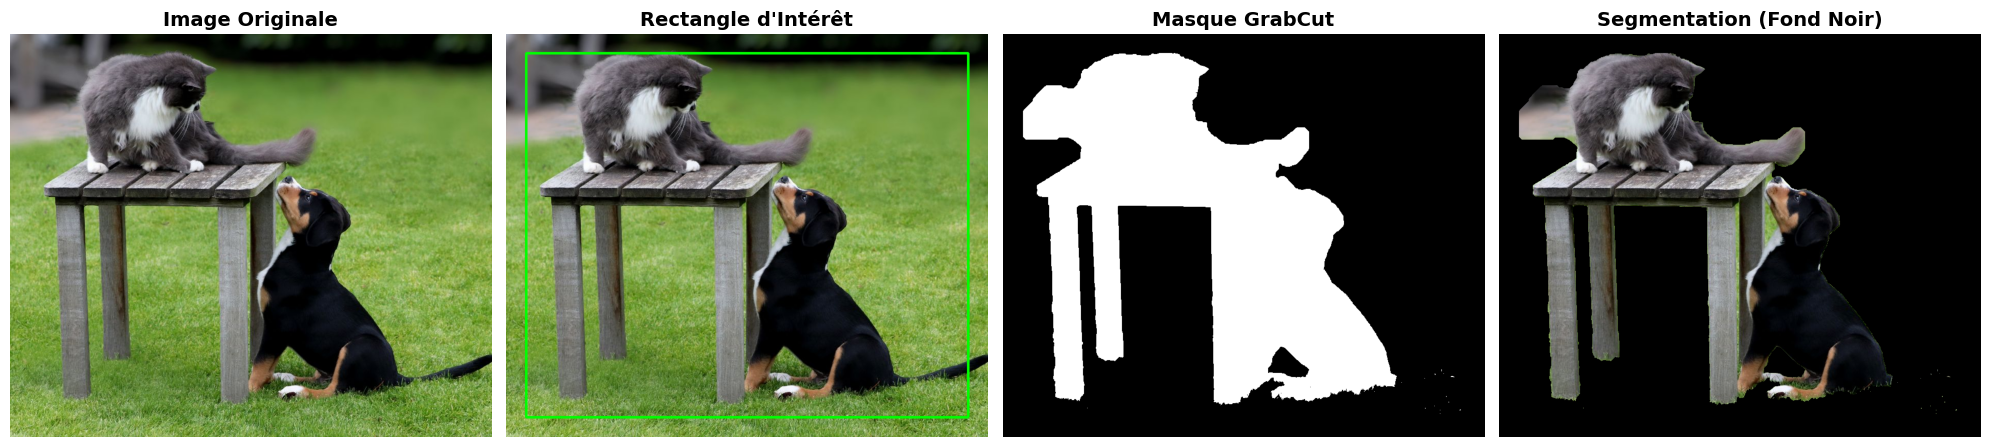

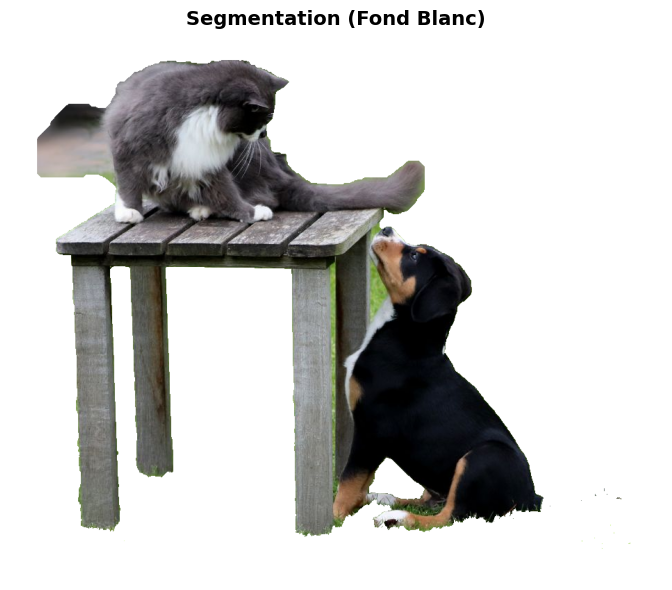

In [ ]:
# ============================================================================
# TECHNIQUE RÉCENTE: GRABCUT ALGORITHM (2004)
# ============================================================================

print("\n" + "="*80)
print("🟢 TECHNIQUE RÉCENTE: ALGORITHME GRABCUT (2004)")
print("="*80)
print("Description: Segmentation interactive basée sur les graphes")
print("Inventée par: Carsten Rother, Vladimir Kolmogorov et Andrew Blake\n")

def segmentation_grabcut(image):
    """
    Segmentation d'image utilisant l'algorithme GrabCut

    Étapes:
    1. Définir un rectangle autour de l'objet d'intérêt
    2. Initialiser le modèle GrabCut
    3. Itérer pour affiner la segmentation
    4. Créer le masque final
    5. Extraire l'objet segmenté
    """

    # Étape 1: Définir le rectangle englobant
    print("⚙️ Étape 1/5: Définition du rectangle d'intérêt...")
    # Rectangle: (x, y, largeur, hauteur)
    # On prend une marge de 5% sur chaque côté
    height, width = image.shape[:2]
    margin = int(min(width, height) * 0.05)
    rect = (margin, margin, width - 2*margin, height - 2*margin)

    # Étape 2: Initialiser les structures pour GrabCut
    print("⚙️ Étape 2/5: Initialisation du modèle GrabCut...")
    masque = np.zeros(image.shape[:2], np.uint8)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)

    # Étape 3: Application de GrabCut
    print("⚙️ Étape 3/5: Application de GrabCut (5 itérations)...")
    cv2.grabCut(image, masque, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

    # Étape 4: Créer le masque binaire
    print("⚙️ Étape 4/5: Création du masque final...")
    # 0 et 2 = fond, 1 et 3 = premier plan
    masque_final = np.where((masque == 2) | (masque == 0), 0, 1).astype('uint8')

    # Étape 5: Appliquer le masque à l'image
    print("⚙️ Étape 5/5: Extraction de l'objet segmenté...")
    resultat = image * masque_final[:, :, np.newaxis]

    # Créer une version avec fond blanc
    fond_blanc = image.copy()
    fond_blanc[masque_final == 0] = [255, 255, 255]

    # Créer une image montrant le rectangle initial
    image_avec_rect = image.copy()
    cv2.rectangle(image_avec_rect, (rect[0], rect[1]),
                  (rect[0]+rect[2], rect[1]+rect[3]), (0, 255, 0), 3)

    print("✅ GrabCut terminé!")

    return {
        'rectangle': image_avec_rect,
        'masque': masque_final * 255,
        'resultat_fond_noir': resultat,
        'resultat_fond_blanc': fond_blanc
    }

# Application de GrabCut
resultats_grabcut = segmentation_grabcut(image_originale)

# Affichage des résultats GrabCut
print("\n📊 RÉSULTATS GRABCUT:")
afficher_resultats(
    [
        image_originale,
        resultats_grabcut['rectangle'],
        resultats_grabcut['masque'],
        resultats_grabcut['resultat_fond_noir']
    ],
    [
        'Image Originale',
        'Rectangle d\'Intérêt',
        'Masque GrabCut',
        'Segmentation (Fond Noir)'
    ],
    figsize=(20, 5)
)

afficher_resultats(
    [resultats_grabcut['resultat_fond_blanc']],
    ['Segmentation (Fond Blanc)'],
    figsize=(8, 6)
)



📊 COMPARAISON FINALE DES DEUX TECHNIQUES


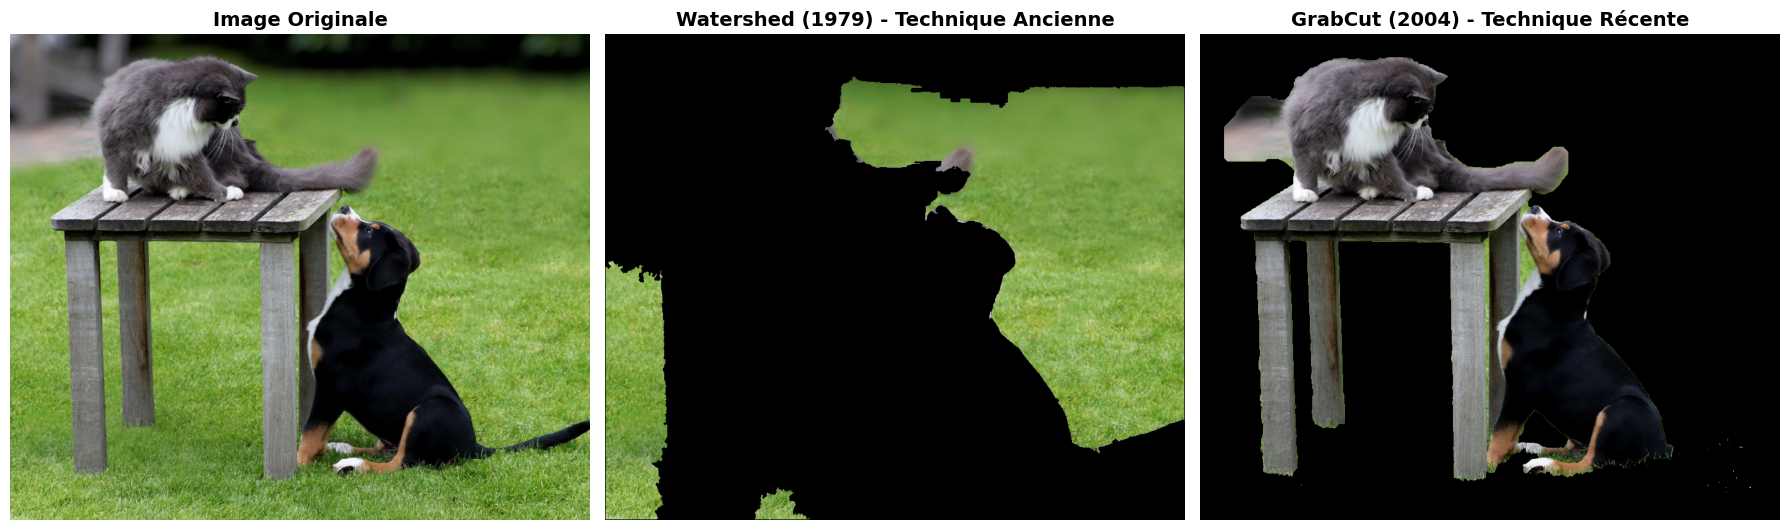

In [ ]:
# ============================================================================
# COMPARAISON FINALE DES DEUX TECHNIQUES
# ============================================================================

print("\n" + "="*80)
print("📊 COMPARAISON FINALE DES DEUX TECHNIQUES")
print("="*80)

afficher_resultats(
    [
        image_originale,
        resultats_watershed['resultat_final'],
        resultats_grabcut['resultat_fond_noir']
    ],
    [
        'Image Originale',
        'Watershed (1979) - Technique Ancienne',
        'GrabCut (2004) - Technique Récente'
    ],
    figsize=(18, 6)
)


In [ ]:
# ============================================================================
# ANALYSE ET COMPARAISON
# ============================================================================

print("\n" + "="*80)
print("📋 ANALYSE COMPARATIVE")
print("="*80)

print("""
┌─────────────────────────────────────────────────────────────────────────┐
│ WATERSHED (1979) - TECHNIQUE ANCIENNE                                   │
├─────────────────────────────────────────────────────────────────────────┤
│ ✓ Avantages:                                                            │
│   • Simple à implémenter                                                │
│   • Rapide en calcul                                                    │
│   • Fonctionne bien pour objets séparés                                 │
│   • Pas besoin d'interaction utilisateur                                │
│                                                                          │
│ ✗ Inconvénients:                                                        │
│   • Sensible au bruit                                                   │
│   • Sur-segmentation fréquente                                          │
│   • Nécessite un bon prétraitement                                      │
│   • Résultats variables selon l'image                                   │
└─────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│ GRABCUT (2004) - TECHNIQUE RÉCENTE                                      │
├─────────────────────────────────────────────────────────────────────────┤
│ ✓ Avantages:                                                            │
│   • Segmentation très précise                                           │
│   • Gère bien les contours complexes                                    │
│   • Robuste aux variations d'éclairage                                  │
│   • Excellente séparation avant-plan/arrière-plan                       │
│                                                                          │
│ ✗ Inconvénients:                                                        │
│   • Plus lent en calcul                                                 │
│   • Nécessite définition d'un rectangle                                 │
│   • Peut nécessiter plusieurs itérations                                │
│   • Plus complexe à implémenter                                         │
└─────────────────────────────────────────────────────────────────────────┘
""")

print("\n🎯 CONCLUSION:")
print("GrabCut offre généralement une meilleure qualité de segmentation,")
print("tandis que Watershed est plus rapide mais nécessite un meilleur prétraitement.")
print("\n✅ Code exécuté avec succès!")
print("="*80)


📋 ANALYSE COMPARATIVE

┌─────────────────────────────────────────────────────────────────────────┐
│ WATERSHED (1979) - TECHNIQUE ANCIENNE                                   │
├─────────────────────────────────────────────────────────────────────────┤
│ ✓ Avantages:                                                            │
│   • Simple à implémenter                                                │
│   • Rapide en calcul                                                    │
│   • Fonctionne bien pour objets séparés                                 │
│   • Pas besoin d'interaction utilisateur                                │
│                                                                          │
│ ✗ Inconvénients:                                                        │
│   • Sensible au bruit                                                   │
│   • Sur-segmentation fréquente                                          │
│   • Nécessite un bon prétraitement                           

Etape 1/3: Conversion en niveaux de gris...
Etape 2/3: Application du flou gaussien...
Etape 3/3: Detection de Canny...
Detection Canny terminee!


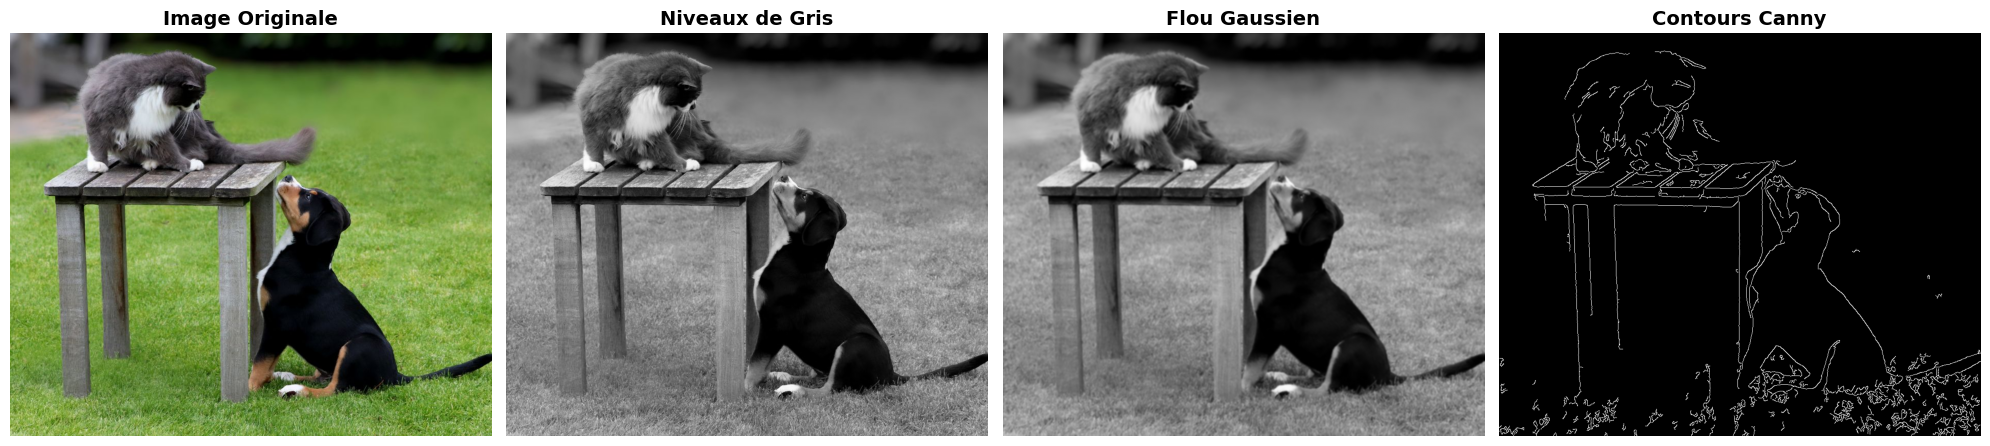

In [ ]:
def detection_canny(image):
    """
    Detection de contours avec l'algorithme de Canny

    Etapes:
    1. Conversion en niveaux de gris
    2. Reduction du bruit avec flou gaussien
    3. Calcul du gradient (intensite et direction)
    4. Suppression des non-maximums
    5. Seuillage par hysteresis (seuils bas et haut)
    """

    # Etape 1: Conversion en niveaux de gris
    print("Etape 1/3: Conversion en niveaux de gris...")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Etape 2: Reduction du bruit avec flou gaussien
    print("Etape 2/3: Application du flou gaussien...")
    blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)

    # Etape 3: Detection de contours avec Canny
    print("Etape 3/3: Detection de Canny...")
    # Seuils: bas=50, haut=150 (valeurs typiques)
    contours_canny = cv2.Canny(blurred, 50, 150)

    print("Detection Canny terminee!")

    return {
        'image_grise': gray,
        'image_floutee': blurred,
        'contours': contours_canny
    }

# Application de Canny
resultats_canny = detection_canny(image_originale)

# Affichage des resultats
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Image originale
axes[0].imshow(cv2.cvtColor(image_originale, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image Originale', fontsize=14, fontweight='bold')
axes[0].axis('off')

# Image en niveaux de gris
axes[1].imshow(resultats_canny['image_grise'], cmap='gray')
axes[1].set_title('Niveaux de Gris', fontsize=14, fontweight='bold')
axes[1].axis('off')

# Image floutee
axes[2].imshow(resultats_canny['image_floutee'], cmap='gray')
axes[2].set_title('Flou Gaussien', fontsize=14, fontweight='bold')
axes[2].axis('off')

# Contours detectes
axes[3].imshow(resultats_canny['contours'], cmap='gray')
axes[3].set_title('Contours Canny', fontsize=14, fontweight='bold')
axes[3].axis('off')

plt.tight_layout()
plt.show()

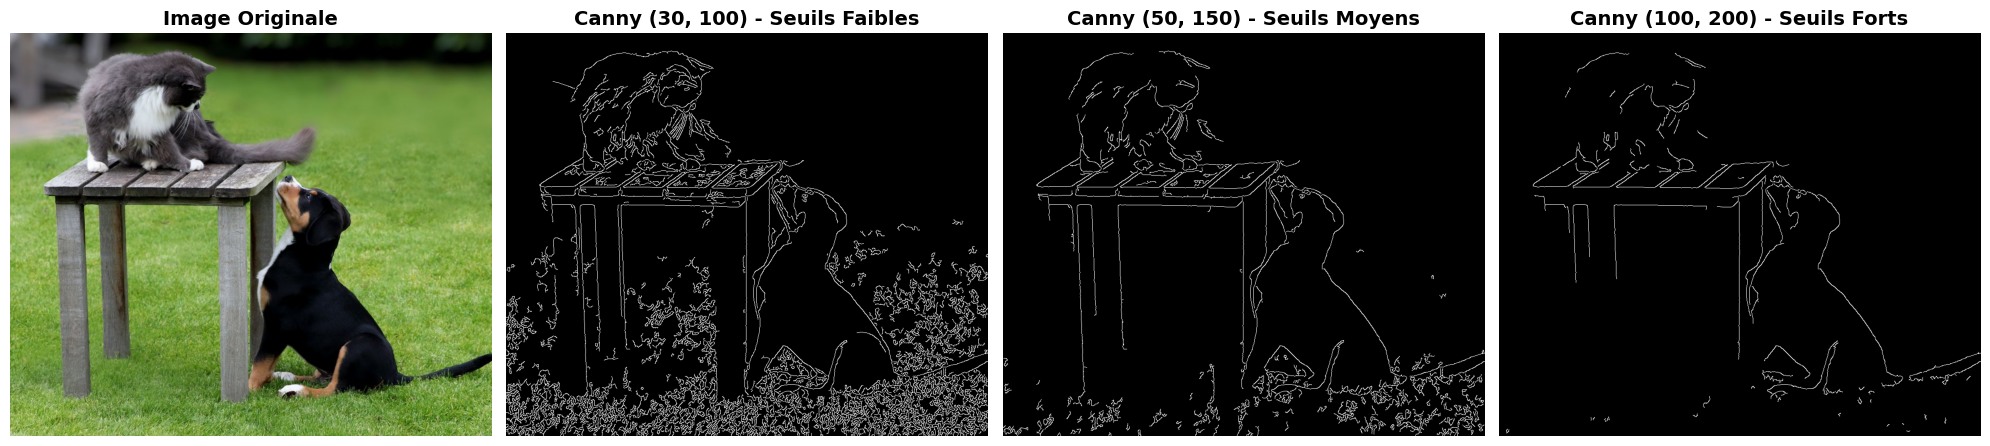

In [ ]:
# Tester differents seuils
gray = cv2.cvtColor(image_originale, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)

# Differentes combinaisons de seuils
canny_faible = cv2.Canny(blurred, 30, 100)   # Seuils faibles
canny_moyen = cv2.Canny(blurred, 50, 150)    # Seuils moyens
canny_fort = cv2.Canny(blurred, 100, 200)    # Seuils forts

# Affichage comparatif
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(cv2.cvtColor(image_originale, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image Originale', fontsize=14, fontweight='bold')
axes[0].axis('off')
axes[1].imshow(canny_faible, cmap='gray')
axes[1].set_title('Canny (30, 100) - Seuils Faibles',
                  fontsize=14, fontweight='bold')
axes[1].axis('off')

axes[2].imshow(canny_moyen, cmap='gray')
axes[2].set_title('Canny (50, 150) - Seuils Moyens',
                  fontsize=14, fontweight='bold')
axes[2].axis('off')

axes[3].imshow(canny_fort, cmap='gray')
axes[3].set_title('Canny (100, 200) - Seuils Forts',
                  fontsize=14, fontweight='bold')
axes[3].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def detection_sobel(image):
    """
    Detection de contours avec l'operateur de Sobel

    Etapes:
    1. Conversion en niveaux de gris
    2. Calcul du gradient horizontal (Sobel X)
    3. Calcul du gradient vertical (Sobel Y)
    4. Calcul de la magnitude du gradient
    5. Combinaison des gradients
    """

    # Etape 1: Conversion en niveaux de gris
    print("Etape 1/4: Conversion en niveaux de gris...")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Etape 2: Gradient horizontal (Sobel X)
    print("Etape 2/4: Calcul du gradient horizontal...")
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_x = np.absolute(sobel_x)
    sobel_x = np.uint8(sobel_x)

    # Etape 3: Gradient vertical (Sobel Y)
    print("Etape 3/4: Calcul du gradient vertical...")
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel_y = np.absolute(sobel_y)
    sobel_y = np.uint8(sobel_y)

    # Etape 4: Combinaison des gradients (magnitude)
    print("Etape 4/4: Combinaison des gradients...")
    sobel_combine = cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0)

    # Methode alternative: magnitude euclidienne
    sobel_magnitude = np.sqrt(sobel_x.astype(float)**2 +
                              sobel_y.astype(float)**2)
    sobel_magnitude = np.uint8(sobel_magnitude)

    print("Detection Sobel terminee!")

    return {
        'image_grise': gray,
        'sobel_x': sobel_x,
        'sobel_y': sobel_y,
        'sobel_combine': sobel_combine,
        'sobel_magnitude': sobel_magnitude
    }

# Application de Sobel
resultats_sobel = detection_sobel(image_originale)

# Affichage des resultats
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Ligne 1
axes[0, 0].imshow(cv2.cvtColor(image_originale, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Image Originale', fontsize=14, fontweight='bold')
axes[0, 0].axis('off')

axes[0, 1].imshow(resultats_sobel['image_grise'], cmap='gray')
axes[0, 1].set_title('Niveaux de Gris', fontsize=14, fontweight='bold')
axes[0, 1].axis('off')

axes[0, 2].imshow(resultats_sobel['sobel_x'], cmap='gray')
axes[0, 2].set_title('Sobel X (Horizontal)', fontsize=14, fontweight='bold')
axes[0, 2].axis('off')

# Ligne 2
axes[1, 0].imshow(resultats_sobel['sobel_y'], cmap='gray')
axes[1, 0].set_title('Sobel Y (Vertical)', fontsize=14, fontweight='bold')
axes[1, 0].axis('off')

axes[1, 1].imshow(resultats_sobel['sobel_combine'], cmap='gray')
axes[1, 1].set_title('Sobel Combine (Moyenne)', fontsize=14, fontweight='bold')
axes[1, 1].axis('off')

axes[1, 2].imshow(resultats_sobel['sobel_magnitude'], cmap='gray')
axes[1, 2].set_title('Sobel Magnitude', fontsize=14, fontweight='bold')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

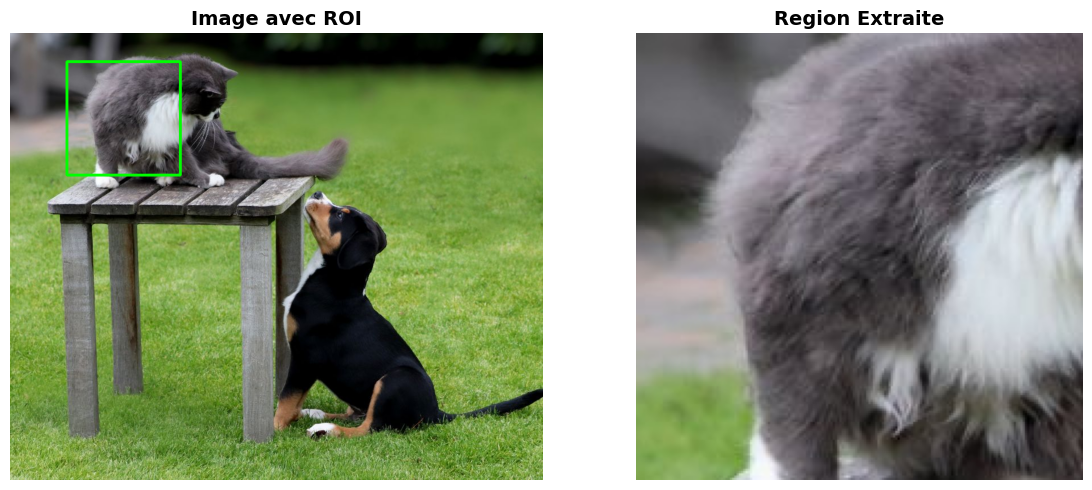

Region extraite: Position (100,50), Taille 200x200


In [ ]:
# Definir la region d'interet (ROI)
# Format: [y_debut:y_fin, x_debut:x_fin]
x, y, largeur, hauteur = 100, 50, 200, 200
roi = image_originale[y:y+hauteur, x:x+largeur]

# Creer une copie pour montrer le rectangle
image_avec_roi = image_originale.copy()
cv2.rectangle(image_avec_roi, (x, y),
              (x+largeur, y+hauteur), (0, 255, 0), 3)

# Affichage
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(cv2.cvtColor(image_avec_roi, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image avec ROI', fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
axes[1].set_title('Region Extraite', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Region extraite: Position ({x},{y}), Taille {largeur}x{hauteur}")

Region: Position (150,100), Taille 250x250
Nombre de contours detectes: 248
Coordonnees du premier contour (5 premiers points):
  Point 1: x=396, y=336
  Point 2: x=399, y=336


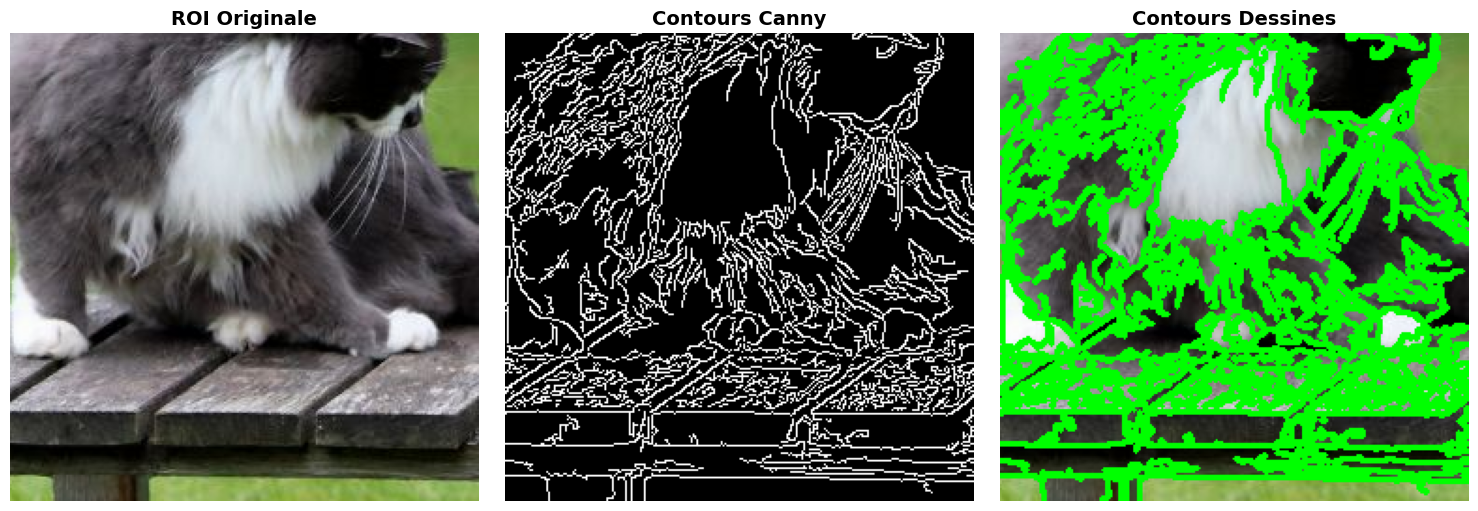

In [ ]:
# Definir la region d'interet
x, y, largeur, hauteur = 150, 100, 250, 250
roi = image_originale[y:y+hauteur, x:x+largeur]

# Convertir la ROI en niveaux de gris
roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Detecter les contours avec Canny
contours_roi = cv2.Canny(roi_gray, 50, 150)

# Trouver les contours
contours, _ = cv2.findContours(contours_roi, cv2.RETR_EXTERNAL,
                                cv2.CHAIN_APPROX_SIMPLE)

# Dessiner les contours sur la ROI
roi_avec_contours = roi.copy()
cv2.drawContours(roi_avec_contours, contours, -1, (0, 255, 0), 2)

# Afficher les coordonnees des contours
print(f"Region: Position ({x},{y}), Taille {largeur}x{hauteur}")
print(f"Nombre de contours detectes: {len(contours)}")
if len(contours) > 0:
    print(f"Coordonnees du premier contour (5 premiers points):")
    for i, point in enumerate(contours[0][:5]):
        px, py = point[0]
        print(f"  Point {i+1}: x={px+x}, y={py+y}")

# Affichage
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
axes[0].set_title('ROI Originale', fontsize=14, fontweight='bold')
axes[0].axis('off')

axes[1].imshow(contours_roi, cmap='gray')
axes[1].set_title('Contours Canny', fontsize=14, fontweight='bold')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(roi_avec_contours, cv2.COLOR_BGR2RGB))
axes[2].set_title('Contours Dessines', fontsize=14, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()